In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import

In [1]:
path = 'C:/Users/Moi/Desktop/Travail_Lille/bigdata/'
data = pd.read_csv("%sdata/modifie/trainFinal.csv" % path, parse_dates = ['date'], index_col='date')
data = data.drop(['Unnamed: 0','id','dateStoreNbr','transaction'], axis=1)
display(data)

test = pd.read_csv("%sdata/modifie/testFinal.csv" % path, parse_dates = ['date'], index_col='date')
test = test.drop(['Unnamed: 0','id','dateCityKey','dateStateKey','dateStoreNbr'], axis=1)
test['sales'] = np.nan
display(test)

NameError: name 'pd' is not defined

# Régression linéaire  
&emsp; https://datagy.io/python-sklearn-linear-regression/



In [ ]:
display(data)

store_nbr                      family     sales  onpromotion  \
date                                                                       
2013-01-01          1                  AUTOMOTIVE     0.000            0   
2013-01-01          1                   BABY CARE     0.000            0   
2013-01-01          1                      BEAUTY     0.000            0   
2013-01-01          1                   BEVERAGES     0.000            0   
2013-01-01          1                       BOOKS     0.000            0   
...               ...                         ...       ...          ...   
2017-08-15          9                     POULTRY   438.133            0   
2017-08-15          9              PREPARED FOODS   154.553            1   
2017-08-15          9                     PRODUCE  2419.729          148   
2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000            8   
2017-08-15          9                     SEAFOOD    16.000            0   

             city      state  flagHoliday  dateStoreNbr  transactions  \
date                                                                    
2013-01-01  Quito  Pichincha            1  2013-01-01_1           NaN   
2013-01-01  Quito  Pichincha            1  2013-01-01_1           NaN   
2013-01-01  Quito  Pichincha            1  2013-01-01_1           NaN   
2013-01-01  Quito  Pichincha            1  2013-01-01_1           NaN   
2013-01-01  Quito  Pichincha            1  2013-01-01_1           NaN   
...           ...        ...          ...           ...           ...   
2017-08-15  Quito  Pichincha            0  2017-08-15_9        2155.0   
2017-08-15  Quito  Pichincha            0  2017-08-15_9        2155.0   
2017-08-15  Quito  Pichincha            0  2017-08-15_9        2155.0   
2017-08-15  Quito  Pichincha            0  2017-08-15_9        2155.0   
2017-08-15  Quito  Pichincha            0  2017-08-15_9        2155.0   

            dcoilwtico  
date                    
2013-01-01       93.12  
2013-01-01       93.12  
2013-01-01       93.12  
2013-01-01       93.12  
2013-01-01       93.12  
...                ...  
2017-08-15       47.57  
2017-08-15       47.57  
2017-08-15       47.57  
2017-08-15       47.57  
2017-08-15       47.57  

[3000888 rows x 10 columns]

## Gestion des valeurs manquantes

In [ ]:
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
data.info()

NameError: name 'data' is not defined

## Matrice des corrélations

<ipython-input-45-3593ec79b0d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


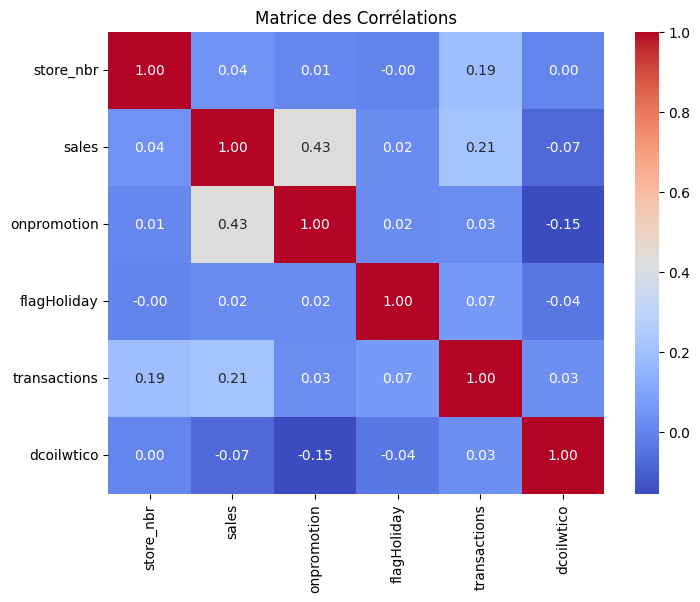

In [ ]:
corr_matrix = data.corr()

# Tracer la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice des Corrélations')
plt.show()

## Graphiques croisés

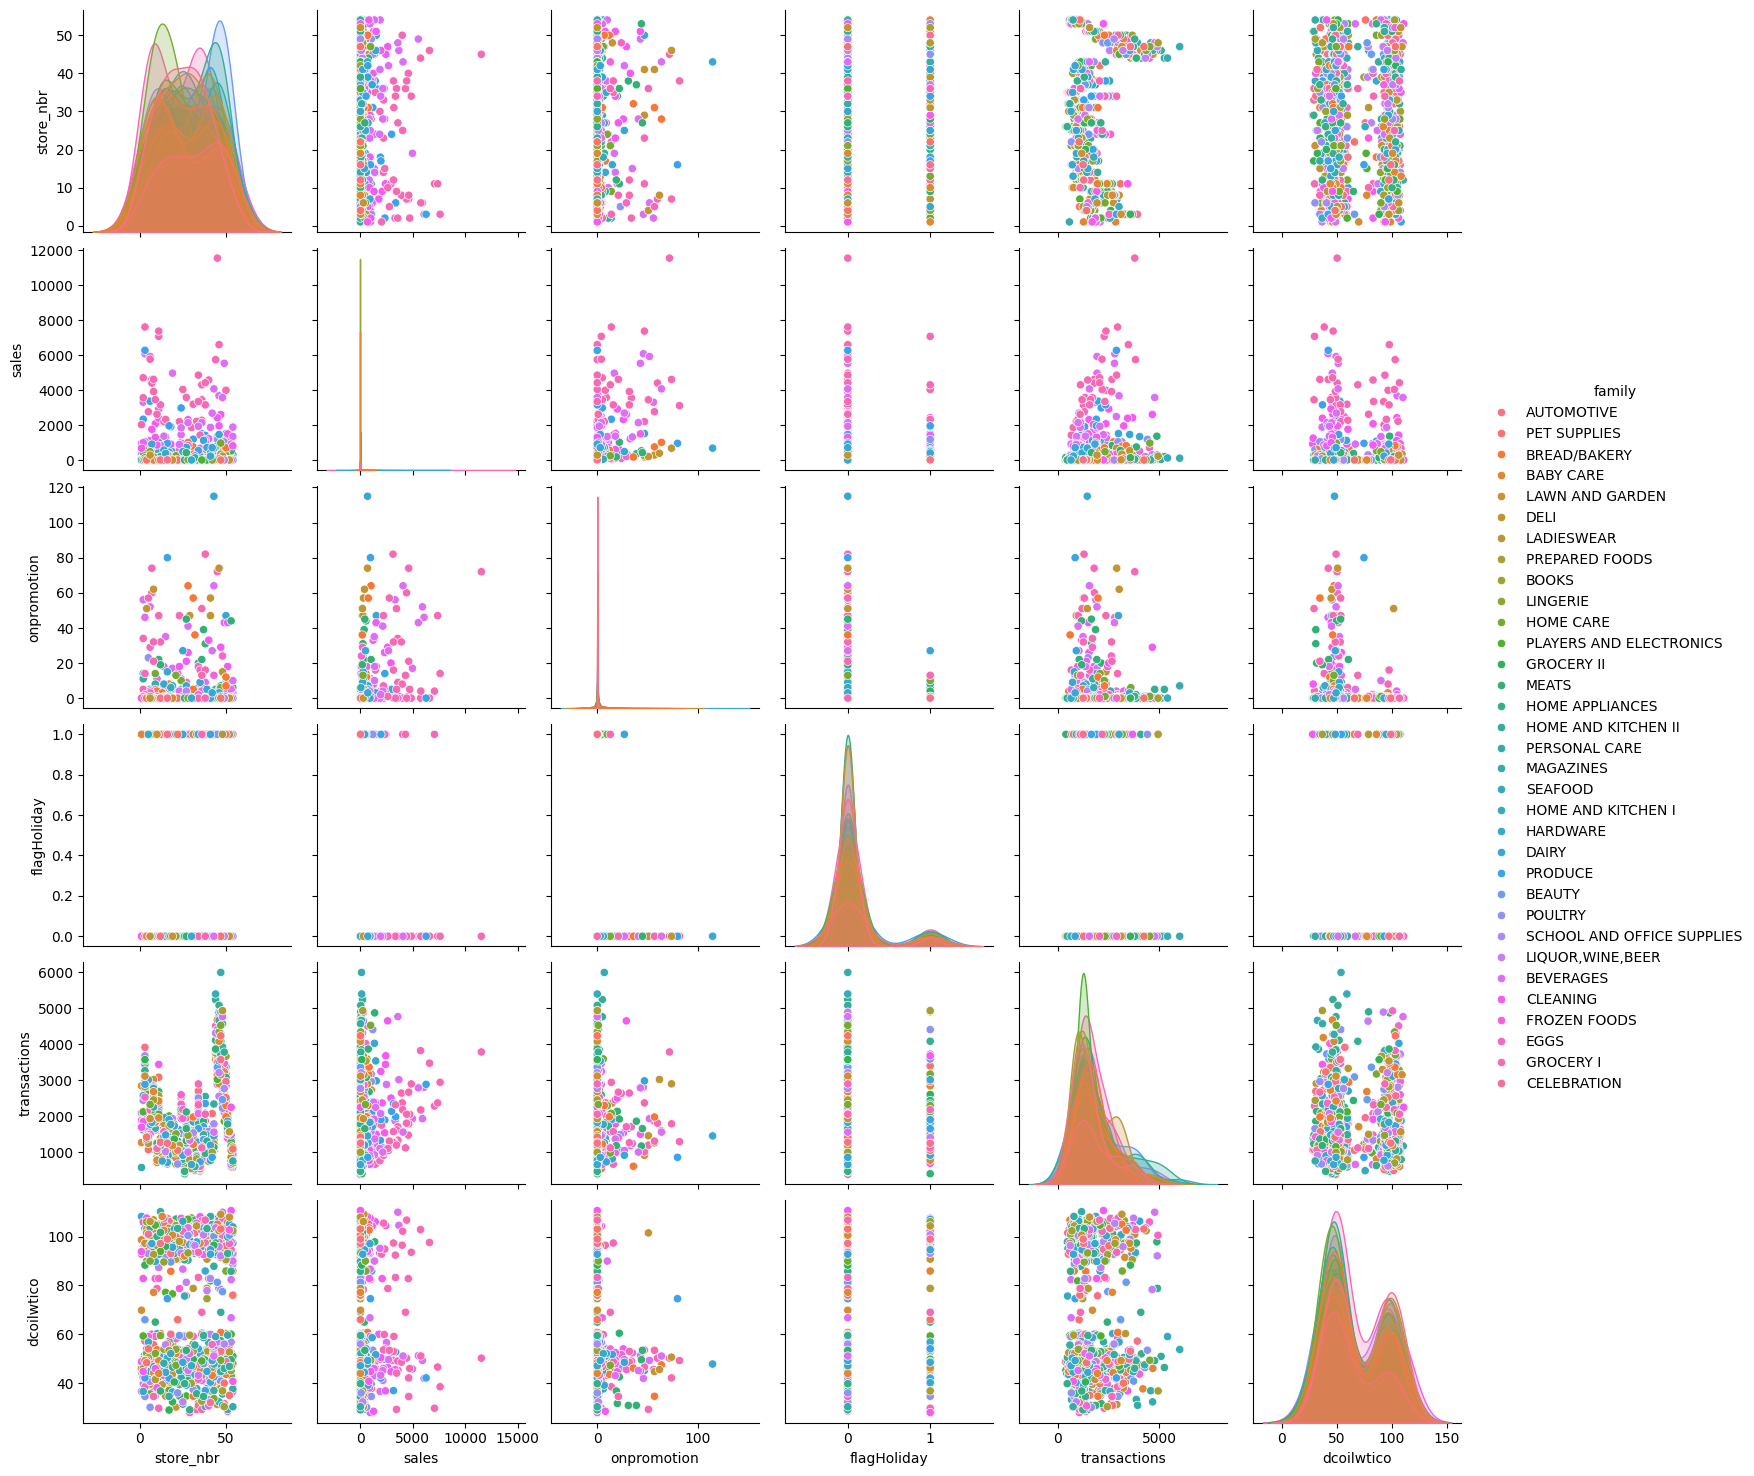

In [ ]:
prPlot = data.sample(n=1000, random_state=1)
sns.pairplot(prPlot, hue='family')

## Passage de qualitatif à quantitatif

In [ ]:
data['familyCat'] = data.family.astype('category').cat.codes
data['cityCat'] = data.city.astype('category').cat.codes
data['stateCat'] = data.state.astype('category').cat.codes

NameError: name 'data' is not defined

In [ ]:
display(data.family.astype('category').cat.categories)
display(data.city.astype('category').cat.categories)
display(data.state.astype('category').cat.categories)

Index(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
       'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
      dtype='object')

Index(['Ambato', 'Babahoyo', 'Cayambe', 'Cuenca', 'Daule', 'El Carmen',
       'Esmeraldas', 'Guaranda', 'Guayaquil', 'Ibarra', 'Latacunga',
       'Libertad', 'Loja', 'Machala', 'Manta', 'Playas', 'Puyo', 'Quevedo',
       'Quito', 'Riobamba', 'Salinas', 'Santo Domingo'],
      dtype='object')

Index(['Azuay', 'Bolivar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas',
       'Guayas', 'Imbabura', 'Loja', 'Los Rios', 'Manabi', 'Pastaza',
       'Pichincha', 'Santa Elena', 'Santo Domingo de los Tsachilas',
       'Tungurahua'],
      dtype='object')

In [ ]:
test['familyCat'] = test.family.astype('category').cat.codes
test['cityCat'] = test.city.astype('category').cat.codes
test['stateCat'] = test.state.astype('category').cat.codes

NameError: name 'test' is not defined

In [ ]:
display(test.family.astype('category').cat.categories)
display(test.city.astype('category').cat.categories)
display(test.state.astype('category').cat.categories)

Index(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
       'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
      dtype='object')

Index(['Ambato', 'Babahoyo', 'Cayambe', 'Cuenca', 'Daule', 'El Carmen',
       'Esmeraldas', 'Guaranda', 'Guayaquil', 'Ibarra', 'Latacunga',
       'Libertad', 'Loja', 'Machala', 'Manta', 'Playas', 'Puyo', 'Quevedo',
       'Quito', 'Riobamba', 'Salinas', 'Santo Domingo'],
      dtype='object')

Index(['Azuay', 'Bolivar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas',
       'Guayas', 'Imbabura', 'Loja', 'Los Rios', 'Manabi', 'Pastaza',
       'Pichincha', 'Santa Elena', 'Santo Domingo de los Tsachilas',
       'Tungurahua'],
      dtype='object')

In [ ]:
train2 = data.drop(['family','city','state'], axis=1)
test2 = test.drop(['family','city','state'], axis=1)

NameError: name 'data' is not defined

In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     int64  
 1   sales         float64
 2   onpromotion   int64  
 3   flagHoliday   int64  
 4   transactions  float64
 5   dcoilwtico    float64
 6   familyCat     int8   
 7   CityCat       int8   
 8   StateCat      int8   
dtypes: float64(3), int64(3), int8(3)
memory usage: 168.9 MB


None

In [ ]:
#X_train = train2[['store_nbr', 'onpromotion','flagHoliday','dcoilwtico', 'familyCat', 'cityCat','stateCat']] #'type','cluster','transactions'
#X_test = test2[['store_nbr', 'onpromotion','flagHoliday','dcoilwtico', 'familyCat', 'cityCat','stateCat']] #'type','cluster','transactions'

#y_train = train['sales']
#y_test = test2['sales']

X = train2[['store_nbr', 'onpromotion','flagHoliday','dcoilwtico', 'familyCat', 'cityCat','stateCat']]
y = train2['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

# Creating a new model and fitting it
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Prediction new values
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.20140162884239732
The rmse is:  988.737275303005


In [ ]:
coefs = multi_model.coef_
intercept = multi_model.intercept_
print(coefs)
print(intercept)

[  4.23246698  36.56144708  41.96923098  -0.45611465 -10.84529405
   6.31279225  15.05791292]
133.27385271036957


In [ ]:
test2.sales = test2.store_nbr*coefs[0] + test2.onpromotion*coefs[1] + test2.flagHoliday*coefs[2] + test2.dcoilwtico*coefs[3] + test2.familyCat*coefs[4] + test2.cityCat*coefs[5] + test2.stateCat*coefs[6]
display(test2)

store_nbr  onpromotion  flagHoliday  transactions  dcoilwtico  \
date                                                                        
2017-08-16          1            0            0           NaN       46.80   
2017-08-16          1            0            0           NaN       46.80   
2017-08-16          1            2            0           NaN       46.80   
2017-08-16          1           20            0           NaN       46.80   
2017-08-16          1            0            0           NaN       46.80   
...               ...          ...          ...           ...         ...   
2017-08-31          9            1            0           NaN       47.26   
2017-08-31          9            0            0           NaN       47.26   
2017-08-31          9            1            0           NaN       47.26   
2017-08-31          9            9            0           NaN       47.26   
2017-08-31          9            0            0           NaN       47.26   

                 sales  familyCat  cityCat  stateCat  
date                                                  
2017-08-16  277.211517          0       18        12  
2017-08-16  266.366223          1       18        12  
2017-08-16  328.643823          2       18        12  
2017-08-16  975.904576          3       18        12  
2017-08-16  233.830341          4       18        12  
...                ...        ...      ...       ...  
2017-08-31   43.754654         28       18        12  
2017-08-31   -3.652087         29       18        12  
2017-08-31   22.064066         30       18        12  
2017-08-31  303.710348         31       18        12  
2017-08-31  -36.187970         32       18        12  

[28512 rows x 9 columns]

# Modèle ARIMA  

## &emsp; Vérification du caractère stationnaire de la série

## &emsp; &emsp; Test augmenté de Dickey-Fuller  
Hypothèse nulle, H0: la série n'est pas stationnaire  
Hypothèse alternative, H1: la série est stationnaire

In [1]:
result = adfuller(data.sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

NameError: name 'adfuller' is not defined

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.sales); axes[0, 0].set_title('Original Series')
plot_acf(data.sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
display(data.sales.diff())

In [ ]:
plt.figure(figsize=(32,10), dpi=500)
plot_acf(data.sales)
plt.show()

In [ ]:
plt.show()

In [4]:
X_seasonal = data.in_sample()

day_of_week = pd.Series(X_seasonal.date.dayofweek, index = index_)
X_day_of_week = pd.get_dummies(day_of_week, prefix = 'day_of_week')
X_seasonal = pd.concat([X_seasonal, X_day_of_week], axis=1)

# Check
X_seasonal.shape, X_seasonal.isna().sum().sum()

AttributeError: 'DataFrame' object has no attribute 'in_sample'

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier

fourier = CalendarFourier(freq="A", order=10)            
dp_fourier = DeterministicProcess(
            index = index_,
            constant=False,             
            order=1,             
            seasonal=True,                                    
            additional_terms=[fourier],     
            drop=True
)
X_fourier = dp_fourier.in_sample()
X_seasonal = pd.concat ([X_seasonal, X_fourier], axis=1)

# Check
X_seasonal.shape, X_seasonal.isna().sum().sum()